In [1]:
import utils
import skimage
import skimage.morphology
import numpy as np
import pathlib
import matplotlib.pyplot as plt


In [2]:
def distance_transform(im: np.ndarray) -> np.ndarray:
    """
        A function that computes the distance to the closest boundary pixel.

        args:
            im: np.ndarray of shape (H, W) with boolean values (dtype=np.bool)
        return:
            (np.ndarray) of shape (H, W). dtype=np.int32
    """
    ### START YOUR CODE HERE ### (You can change anything inside this block)
    assert im.dtype == bool
    result = np.zeros(im.shape, dtype=np.int32)        # Initialize the result image as zeros
    structuring_element = np.ones((3, 3), dtype=bool)  # Define the structuring element
    for i in range(100):        # Iterate many times (chosen 100)
        # Perform the erosion operation
        im = skimage.morphology.binary_erosion(im, footprint = structuring_element, out=im)
        # Adding the remaing pixels to the result image
        result = result + im
    return result
    ### END YOUR CODE HERE ### 

In [3]:
if __name__ == "__main__":
    im = utils.read_image("noisy-filtered.png", image_folder=pathlib.Path("image_processed")) # <-- This image is created in noise_filtering
    binary_image = (im != 0)
    distance = distance_transform(binary_image)

    assert im.shape == distance.shape, "Expected image shape ({}) to be same as resulting image shape ({})".format(
            im.shape, distance.shape)
    assert distance.dtype == np.int32, "Expected resulting image dtype to be np.int32. Was: {}".format(
            distance.dtype)

    distance = utils.to_uint8(distance)
    utils.save_im("noisy-distance.png", distance)


Reading image: image_processed\noisy-filtered.png
Saving image to: image_processed\noisy-distance.png


c:\Users\jonas\OneDrive - NTNU\Generelt\Studiene\Git_repo\Image_processing\Assignment_3\utils.py:40: UserWarning: Image min/max is outside the range [0.0, 1.0]. Squashing the image to this range. (Can be safely ignored)
  warnings.warn("Image min/max is outside the range [0.0, 1.0]. Squashing the image to this range. (Can be safely ignored)")


Reading image: images\noisy.png


(np.float64(-0.5), np.float64(457.5), np.float64(347.5), np.float64(-0.5))

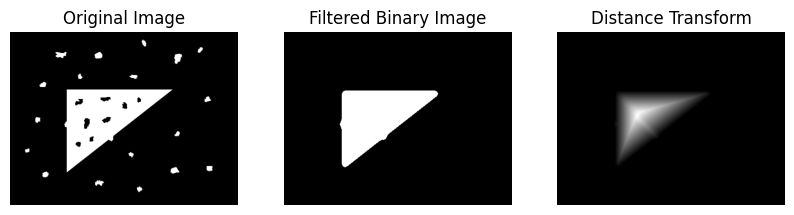

In [4]:
im_original = utils.read_image("noisy.png", image_folder=pathlib.Path("images"))

fig, axes = plt.subplots(1, 3, figsize=(10, 5))
axes[0].imshow(im_original, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(im, cmap='gray')
axes[1].set_title('Filtered Binary Image')
axes[1].axis('off')
axes[2].imshow(distance, cmap='gray')
axes[2].set_title('Distance Transform')
axes[2].axis('off')